# Linear Regression Exercise

In [61]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
# Generating our data.

X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
Y = np.sin(X) + 0.1 * np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)


X = np.hstack((np.ones_like(X), X))

In [63]:
X.shape

(100, 2)

In [64]:
Y.shape

(100, 1)

In [65]:
order = np.random.permutation(len(X))
portion = 20

"""
    Split your data into train and test using the order and permutation variable
"""
train_x = X[order[portion:]]
train_y = Y[order[portion:]]

test_x= X[order[:portion]]
test_y= Y[order[:portion]]

In [66]:
def get_gradient(w, x, y):
    """
        Enter code for error, mse and gradient
    """
    y_estimate = x.dot(w).flatten()
    error = (y.flatten()-y_estimate)
    mse = (1/len(y))* np.sum(np.power(error , 2))
    gradient = -(1/len(y)) * error.dot(x)
    
    return gradient, mse

In [67]:
w = np.random.randn(2)
alpha = 0.0001

"""
    Using the get_gradient function, run the Linear regression
    use iteration of 10000
"""
for i in range(10000):
    gradient, error = get_gradient(w, train_x, train_y)
    
    w_new = w - alpha*gradient
    if i% 100 == 0:
        print("Iterations: %d -Error : %.4f" %(i, error))
        
    w = w_new ## Change to your value

print("w =", w)
print( "Test Cost =", get_gradient(w, test_x, test_y)[1])

Iterations: 0 -Error : 17.6434
Iterations: 100 -Error : 17.3418
Iterations: 200 -Error : 17.0479
Iterations: 300 -Error : 16.7617
Iterations: 400 -Error : 16.4830
Iterations: 500 -Error : 16.2115
Iterations: 600 -Error : 15.9471
Iterations: 700 -Error : 15.6895
Iterations: 800 -Error : 15.4386
Iterations: 900 -Error : 15.1943
Iterations: 1000 -Error : 14.9563
Iterations: 1100 -Error : 14.7244
Iterations: 1200 -Error : 14.4986
Iterations: 1300 -Error : 14.2786
Iterations: 1400 -Error : 14.0643
Iterations: 1500 -Error : 13.8555
Iterations: 1600 -Error : 13.6521
Iterations: 1700 -Error : 13.4540
Iterations: 1800 -Error : 13.2611
Iterations: 1900 -Error : 13.0730
Iterations: 2000 -Error : 12.8899
Iterations: 2100 -Error : 12.7114
Iterations: 2200 -Error : 12.5376
Iterations: 2300 -Error : 12.3682
Iterations: 2400 -Error : 12.2032
Iterations: 2500 -Error : 12.0424
Iterations: 2600 -Error : 11.8858
Iterations: 2700 -Error : 11.7331
Iterations: 2800 -Error : 11.5844
Iterations: 2900 -Error : 

In [68]:
w = np.random.randn(2)
alpha = 0.0001
tolerence=1e-5

"""
    Using the get_gradient function, run the Linear regression
    use iteration of 10000
"""
while True:
        gradient, error = get_gradient(w, train_x, train_y)
    
        w_new = w - alpha*gradient
        if i% 100 == 0:
            print("Iterations: %d -Error : %.4f" %(i, error))
        
        w = w_new ## Change to your value
        if np.sum(np.abs(w_new - w)) < tolerence:
            break

print("w =", w)
print( "Test Cost =", get_gradient(w, test_x, test_y)[1])

w = [1.55443523 0.57586793]
Test Cost = 8.146529522462666


In [69]:


def gradient_descent(X,y,theta,alpha=0.1,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    mse_new = np.zeros(iterations)
    theta_new = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*alpha*( X.T.dot((prediction - y)))
        theta_new[it,:] =theta.T
        mse_new[it]  = get_gradient(theta,X,y)
        
    return theta, mse_new, theta_new



Plotting the Model we obtained

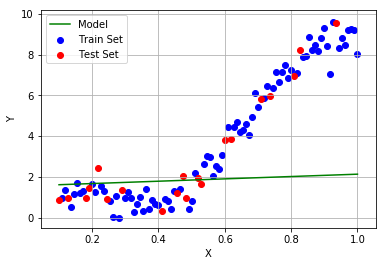

In [70]:
plt.plot(X[:,1], X.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Generate contour plot of the cost function

/usr/lib/python3/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


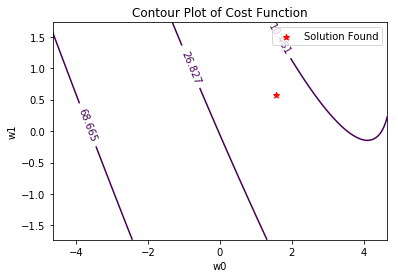

In [71]:
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()

Extra Exercises.

Describe what you see in the both diagrams you have.

In [72]:
### The error of estimator is a bit closed to 